Started execution of sph.py
sph.py executed in 1723.82 seconds
Started execution of data_structures.py
data_structures.py executed in 1146.20 seconds
Started execution of dask_array.py
dask_array.py executed in 604.05 seconds
Started execution of delayed_dask.py
delayed_dask.py executed in 1250.25 seconds
Started execution of futures_dask.py
Dask dashboard available at: http://127.0.0.1:8790/status


2025-02-21 16:32:51,898 - distributed.worker - ERROR - failed during get data with tcp://127.0.0.1:60241 -> tcp://127.0.0.1:60242
Traceback (most recent call last):
  File "/Users/carlottaholzle/Desktop/KTH Assignments/Computational-Astrophysics/.venv/lib/python3.11/site-packages/tornado/iostream.py", line 962, in _handle_write
    num_bytes = self.write_to_fd(self._write_buffer.peek(size))
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/carlottaholzle/Desktop/KTH Assignments/Computational-Astrophysics/.venv/lib/python3.11/site-packages/tornado/iostream.py", line 1124, in write_to_fd
    return self.socket.send(data)  # type: ignore
           ^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 55] No buffer space available

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/carlottaholzle/Desktop/KTH Assignments/Computational-Astrophysics/.venv/lib/python3.11/site-packages/distributed/worker.py", li

futures_dask.py executed in 4196.99 seconds


,Python File,Execution Time (seconds)
0,sph.py,1723.816978
1,data_structures.py,1146.197064
2,dask_array.py,604.049555
3,delayed_dask.py,1250.246275
4,futures_dask.py,4196.986109


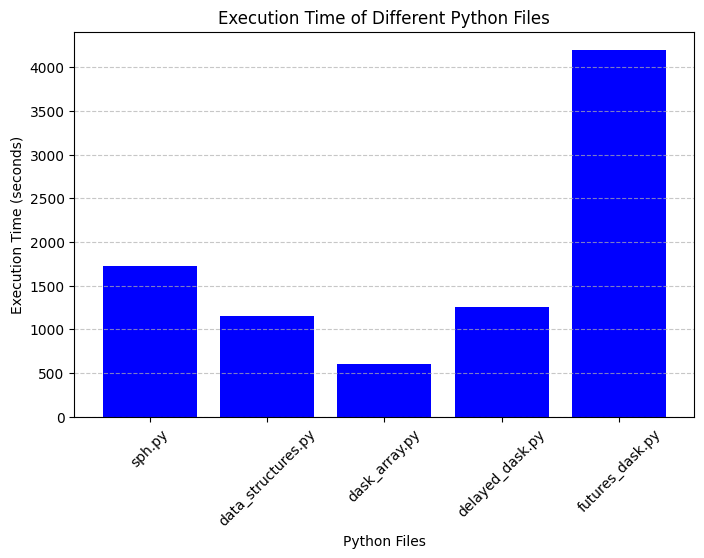

In [1]:
import time
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

# List of Python files to execute
python_files = ["sph.py", "data_structures.py", "dask_array.py", "delayed_dask.py", "futures_dask.py"]

# Store execution times
execution_times = {}

for py_file in python_files:
    print(f"Started execution of {py_file}")
    start_time = time.time()  # Start timing
    subprocess.run(["python", py_file])  # Execute the script
    end_time = time.time()  # End timing

    execution_times[py_file] = end_time - start_time
    print(f"{py_file} executed in {execution_times[py_file]:.2f} seconds")

# Convert execution times to a DataFrame
df = pd.DataFrame(list(execution_times.items()), columns=["Python File", "Execution Time (seconds)"])
display(df)

# Plot the execution times
plt.figure(figsize=(8, 5))
plt.bar(df["Python File"], df["Execution Time (seconds)"], color='blue')
plt.xlabel("Python Files")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time of Different Python Files")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

Python File	Execution Time (seconds)
0	sph.py	1723.816978
1	data_structures.py	1146.197064
2	dask_array.py	604.049555
3	delayed_dask.py	1250.246275
4	futures_dask.py	4196.986109

In [5]:
! python -m kernprof -l sph.py 

Wrote profile results to sph.py.lprof
Inspect results with:
python -m line_profiler -rmt "sph.py.lprof"


In [6]:
! python -m line_profiler -rmt "sph.py.lprof"

Timer unit: 1e-06 s

Total time: 1373.41 s
File: sph.py
Function: getAcc at line 110

Line #      Hits         Time  Per Hit   % Time  Line Contents
   110                                           @profile
   111                                           def getAcc( pos, vel, m, h, k, n, lmbda, nu ):
   112                                           	"""
   113                                           	Calculate the acceleration on each SPH particle
   114                                           	pos   is an N x 3 matrix of positions
   115                                           	vel   is an N x 3 matrix of velocities
   116                                           	m     is the particle mass
   117                                           	h     is the smoothing length
   118                                           	k     equation of state constant
   119                                           	n     polytropic index
   120                                           	lmbda

In [3]:
! python -m kernprof -l data_structures.py 

Wrote profile results to data_structures.py.lprof
Inspect results with:
python -m line_profiler -rmt "data_structures.py.lprof"


In [4]:
! python -m line_profiler -rmt "data_structures.py.lprof"

Timer unit: 1e-06 s

Total time: 946.275 s
File: data_structures.py
Function: getAcc at line 214

Line #      Hits         Time  Per Hit   % Time  Line Contents
   214                                           @profile 
   215                                           def getAcc(pos, vel, m, h, k, n, lmbda, nu):
   216                                               """
   217                                               Calculate the acceleration on each SPH particle
   218                                               """
   219       301       1603.0      5.3      0.0      N = pos.shape[0]
   220                                               
   221       301        828.0      2.8      0.0      pos = np.ascontiguousarray(pos)
   222       301         76.0      0.3      0.0      m = np.ascontiguousarray(m)
   223       301        286.0      1.0      0.0      h = np.ascontiguousarray(h)
   224       301         97.0      0.3      0.0      k = np.ascontiguousarray(k)
   225       301   

## Dask.Array approach 

In [16]:
! python -m kernprof -l dask_array.py 

Wrote profile results to parallel_dask.py.lprof
Inspect results with:
python -m line_profiler -rmt "parallel_dask.py.lprof"


In [19]:
! python -m line_profiler -rmt "dask_array.py.lprof"

Timer unit: 1e-06 s

Total time: 10.8809 s
File: parallel_dask.py
Function: getAcc at line 98

Line #      Hits         Time  Per Hit   % Time  Line Contents
    98                                           @profile
    99                                           def getAcc(pos, vel, m, h, k, n, lmbda, nu):
   100                                               """
   101                                               Calculate the acceleration on each SPH particle using Dask arrays.
   102                                               
   103                                               Parameters:
   104                                                 pos   : N x 3 Dask array of positions
   105                                                 vel   : N x 3 Dask array of velocities
   106                                                 m     : particle mass
   107                                                 h     : smoothing length
   108                                            

In [23]:
! pytest -v test_dask.py

============================= test session starts ==============================
platform darwin -- Python 3.11.6, pytest-8.3.4, pluggy-1.5.0 -- /Users/carlottaholzle/Desktop/KTH Assignments/Computational-Astrophysics/.venv/bin/python
cachedir: .pytest_cache
rootdir: /Users/carlottaholzle/Desktop/KTH Assignments/Computational-Astrophysics
collected 1 item                                                               

test_dask.py::test_daskAcc PASSED                                        [100%]

============================== 1 passed in 2.67s ===============================


## Dask futures approach 
Hypothesis through breaking the pairwise computation into smaller tasks, then being able to submit them all in parallel. 

In [31]:
! python test_chunk.py

Dask dashboard available at: http://127.0.0.1:8790/status

Running simulation with 1 chunk...
/Users/carlottaholzle/Desktop/KTH Assignments/Computational-Astrophysics/.venv/lib/python3.11/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 22.91 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
Chunks: 1, Time: 0.106s

Running simulation with 2 chunks...
Chunks: 2, Time: 0.145s

Running simulation with 4 chunks...
Chunks: 4, Time: 0.200s

Running simulation with 8 chunks...
Chunks: 8, Time: 0.292s

Running simulation with 16 chunks...
Chunks: 16, Time: 0.525s

Running simulation with 32 chunks...
Chunks: 32, Time: 1.300s

Simulation complete. Results: {1: 0.10646224021911621, 2: 0.1446518898010254, 4: 0.1996753215789795

In [29]:
! python -m kernprof -l futures_dask.py 

Dask dashboard available at: http://127.0.0.1:8790/status
Wrote profile results to futures_dask.py.lprof
Inspect results with:
python -m line_profiler -rmt "futures_dask.py.lprof"


In [30]:
! python -m line_profiler -rmt "futures_dask.py.lprof"

Timer unit: 1e-06 s

Total time: 3124.69 s
File: futures_dask.py
Function: getAcc at line 82

Line #      Hits         Time  Per Hit   % Time  Line Contents
    82                                           @profile
    83                                           def getAcc(pos, vel, m, h, k, n, lmbda, nu, num_chunks=10):
    84                                               """
    85                                               Calculate the acceleration on each SPH particle using parallel summation.
    86                                               Scatter large arrays so that they are not repeatedly embedded in the task graph.
    87                                               """
    88       301        366.0      1.2      0.0      N = pos.shape[0]
    89                                               # Compute densities and pressures
    90       301  381917907.0    1e+06     12.2      rho = getDensity(pos, pos, m, h, num_chunks=100)
    91       301      74463.0    247.4    


## Dask Delayed Approach
each call to, getAcc(), getDensity(), etc. becomes a lazy task in a graph.
hypothesize: Sum inside getAcc() broken into smaller tasks by also decorating sub-steps (e.g., partial sums) with @delayed

In [14]:
! python -m kernprof -l delayed_dask.py 

Wrote profile results to delayed_dask.py.lprof
Inspect results with:
python -m line_profiler -rmt "delayed_dask.py.lprof"


In [15]:
! python -m line_profiler -rmt "delayed_dask.py.lprof"

Timer unit: 1e-06 s

Total time: 1715.18 s
File: delayed_dask.py
Function: getAcc at line 34

Line #      Hits         Time  Per Hit   % Time  Line Contents
    34                                           @profile
    35                                           def getAcc(pos, vel, m, h, k, n, lmbda, nu):
    36       301       1209.0      4.0      0.0      N = pos.shape[0]
    37                                           
    38                                               # Call delayed functions normally (no need to wrap in `delayed()` again)
    39       301      26392.0     87.7      0.0      rho = getDensity(pos, pos, m, h)  
    40       301      13777.0     45.8      0.0      P = getPressure(rho, k, n)
    41       301       8363.0     27.8      0.0      separations = getPairwiseSeparations(pos, pos)
    42                                           
    43                                               # Compute all delayed dependencies at once
    44       301   86979852.0 2

# analysis: 
Remark: these times target the getAcc() function not the aditional overhead. this might be higher when using dask. 

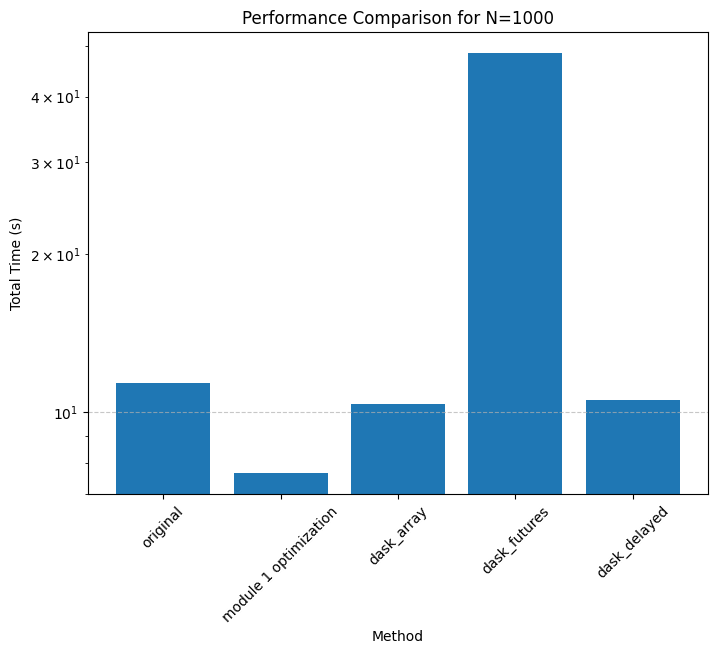

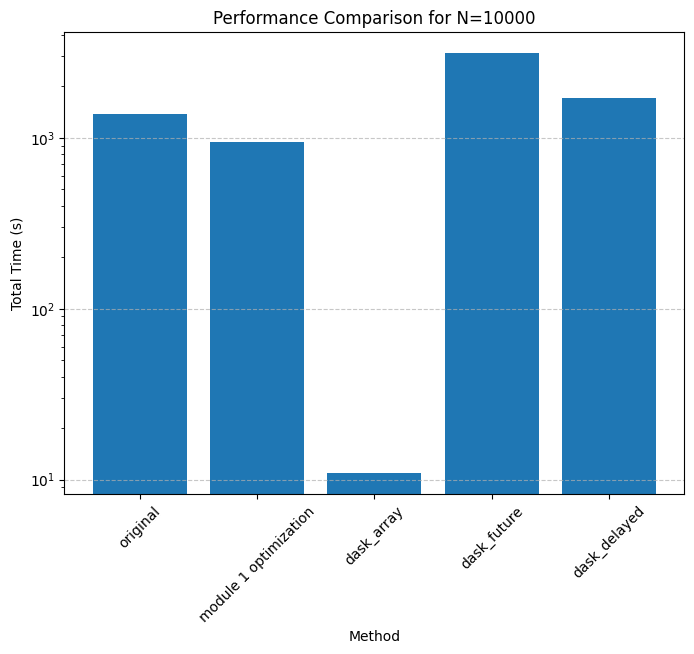

In [31]:
import matplotlib.pyplot as plt

# Data
data = {
    1000: {
        "original": 11.4017,
        "module 1 optimization": 7.65755,
        "dask_array": 10.3941,
        "dask_futures": 48.3674,
        "dask_delayed": 10.5502,
    },
    10000: {
        "original": 1373.41,
        "module 1 optimization": 946.275,
        "dask_array": 10.8809,
        "dask_future": 3124.69,
        "dask_delayed": 1715.18,
    },
}

# Plot each N separately
for N, times in data.items():
    plt.figure(figsize=(8, 6))
    plt.bar(times.keys(), times.values())
    plt.xlabel("Method")
    plt.ylabel("Total Time (s)")
    plt.title(f"Performance Comparison for N={N}")
    plt.xticks(rotation=45)
    plt.yscale("log")  # Using log scale to handle large disparities in values
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()